In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 第一堂課

## 維度縮減 Dimension Reduction

### feature engineering:砍 或是 濃縮

### PCA:數據投影到較低維度的向量空間中

# PCA 

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### Step 1. 開PCA機

In [6]:
pca = PCA(n_components=2)  #壓到2維

### Step 2. 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Step 3. 預測

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X = pca.transform(x)

In [10]:
X[87]

array([ 0.81509524, -0.37203706])

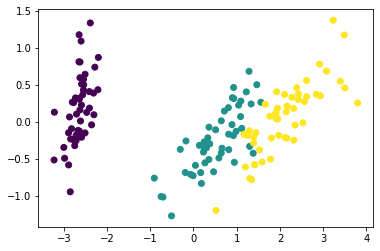

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### 投影成最像它的

### 準備訓練/測試資料

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 0) 

### step 1.  開SVC函數學習機

In [18]:
from sklearn.svm import SVC

In [21]:
clf = SVC(gamma = 'auto')

### Step 2. 訓練 

In [22]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [23]:
y_predict = clf.predict(x_test)

In [24]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

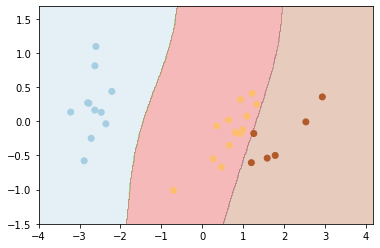

In [25]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.3, cmap = "Paired")
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, cmap = "Paired")

In [26]:
xm.shape

(160, 410)

# 第二堂課

# K-Means自動分類

In [27]:
x = np.random.rand(100,2)

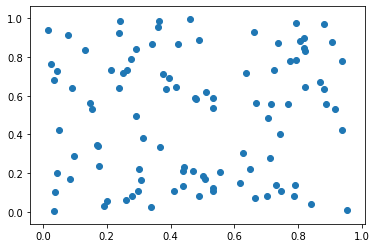

In [28]:
plt.scatter(x[:,0], x[:,1])

### Step 1. 開一台函數學習機

In [29]:
from sklearn.cluster import KMeans

In [31]:
clf = KMeans(n_clusters=3)

### Step 2. 訓練

In [32]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step 3. 預測

In [33]:
clf.predict(x)

array([1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0,
       1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1])

In [34]:
clf.labels_

array([1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0,
       1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1])

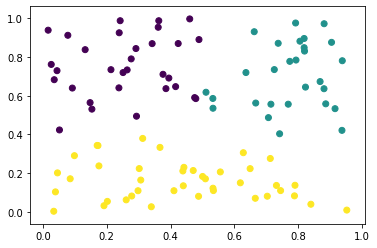

In [36]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

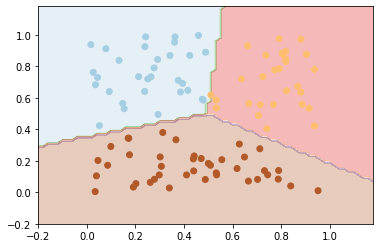

In [38]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")

# 'make_blobs' 生成更像真實世界的數據

In [60]:
from sklearn.datasets.samples_generator import make_blobs

In [49]:
x, y = make_blobs(n_samples = 500, centers = 3,   #分成幾堆
                 n_features = 2,                  #維度   
                 random_state = 0)

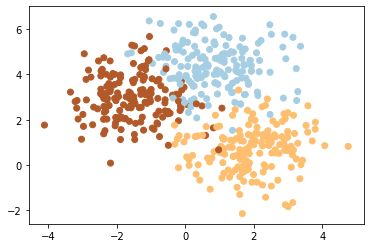

In [50]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

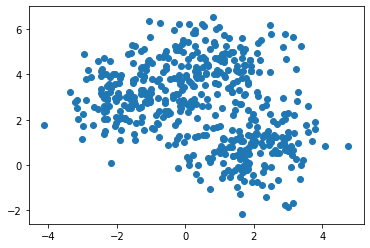

In [51]:
plt.scatter(x[:,0],x[:,1])

In [53]:
clf = KMeans(n_clusters = 3)

In [58]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

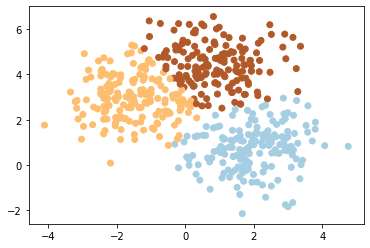

In [59]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")       #clf.label_  是KMeans機器分類的標準

# Mean-Shifts完全自動分類

In [61]:
from sklearn.cluster import MeanShift

### Step 1.

In [69]:
clf = MeanShift(bandwidth = 0.5)

### Step 2.

In [70]:
clf.fit(x)

MeanShift(bandwidth=0.5, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### Step 3.

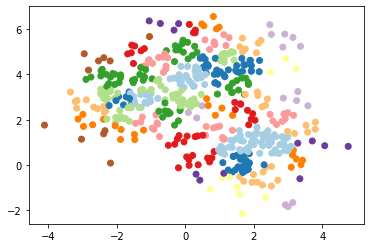

In [71]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_, cmap='Paired')

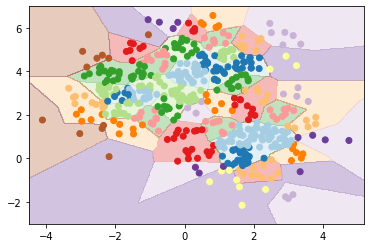

In [72]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")

# cross_val_score 算分數

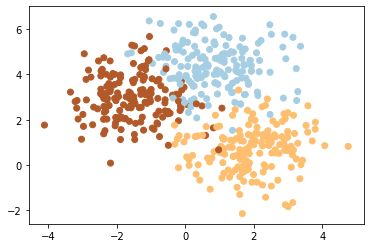

In [75]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired")

In [76]:
from sklearn.model_selection import cross_val_score 

## SVC

In [77]:
from sklearn.svm import SVC

In [78]:
clf = SVC(gamma = 'auto')

In [79]:
scores = cross_val_score(clf, x, y, cv=5)

In [80]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [81]:
scores.max()

0.98989898989899

In [82]:
scores.min()

0.9090909090909091

In [84]:
scores.mean()

0.9420106716554008

## Decision Tree 決定樹

In [85]:
from sklearn.tree import DecisionTreeClassifier 

In [86]:
clf = DecisionTreeClassifier()

In [87]:
scores = cross_val_score(clf, x, y, cv=5)

In [88]:
scores

array([0.91176471, 0.88118812, 0.94949495, 0.90909091, 0.88888889])

In [89]:
scores.max()

0.9494949494949495

In [90]:
scores.mean()

0.9080855144337964

## Random Forest 

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf = RandomForestClassifier(n_estimators=100)   #100棵樹

In [96]:
scores = cross_val_score(clf, x, y, cv=5)

In [97]:
scores.max()

0.9696969696969697

In [98]:
scores.mean()

0.9160063065130043

### 指定題目
資料要蒐集的到 / 想一個題目 輸入是什麼?輸出是什麼? 